In [1]:
from keras.layers import Dense
from keras.models import Input, Model
from keras.callbacks import ModelCheckpoint
from tcn import TCN

batch_size, timesteps, input_dim = None, 20, 1
def get_x_y(size=1000):
    import numpy as np
    pos_indices = np.random.choice(size, size=int(size // 2), replace=False)
    x_train = np.zeros(shape=(size, timesteps, 1))
    y_train = np.zeros(shape=(size, 1))
    x_train[pos_indices, 0] = 1.0
    y_train[pos_indices, 0] = 1.0
    return x_train, y_train

In [2]:
i = Input(batch_shape=(batch_size, timesteps, input_dim))

o = TCN(return_sequences=False)(i)  # The TCN layers are here.
o = Dense(1)(o)

model = Model(inputs=[i], outputs=[o])
model.compile(optimizer='adam', loss='mse')





W0118 00:41:09.141254 140086872401728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0118 00:41:09.160602 140086872401728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0118 00:41:09.164685 140086872401728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0118 00:41:09.229837 140086872401728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0118 00:41:09.615215 140086872401728 de

In [3]:
from keras.backend.tensorflow_backend import set_session
from keras.backend.tensorflow_backend import clear_session
from keras.backend.tensorflow_backend import get_session
import tensorflow

# Reset Keras Session
def reset_keras():
    sess = get_session()
    clear_session()
    sess.close()
    sess = get_session()

    try:
        del classifier # this is from global space - change this as you need
    except:
        pass

    print(gc.collect()) # if it's done something you should see a number being outputted

    # use the same config as you used to create the session
    config = tensorflow.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 1
    config.gpu_options.visible_device_list = "0"
    set_session(tensorflow.Session(config=config))

In [4]:
x, y = get_x_y()
hist=model.fit(x, y, epochs=100, validation_split=0.2)




W0118 00:42:20.849469 140086872401728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 800 samples, validate on 200 samples
Epoch 1/100
800/800 [==============================] - 3s 4ms/step - loss: 0.0497 - val_loss: 5.2935e-04
Epoch 2/100
800/800 [==============================] - 0s 482us/step - loss: 3.0347e-04 - val_loss: 7.3881e-06
Epoch 3/100
800/800 [==============================] - 0s 505us/step - loss: 3.9984e-05 - val_loss: 3.5071e-05
Epoch 4/100
800/800 [==============================] - 0s 526us/step - loss: 2.7489e-05 - val_loss: 1.0122e-05
Epoch 5/100
800/800 [==============================] - 0s 549us/step - loss: 1.8542e-05 - val_loss: 1.4678e-05
Epoch 6/100
800/800 [==============================] - 0s 483us/step - loss: 2.3799e-05 - val_loss: 8.3872e-07
Epoch 7/100
800/800 [==============================] - 0s 536us/step - loss: 3.4201e-07 - val_loss: 2.8075e-07
Epoch 8/100
800/800 [==============================] - 0s 509us/step - loss: 1.1673e-07 - val_loss: 1.6834e-07
Epoch 9/100
800/800 [==============================] - 0s 503us/step - l

[]

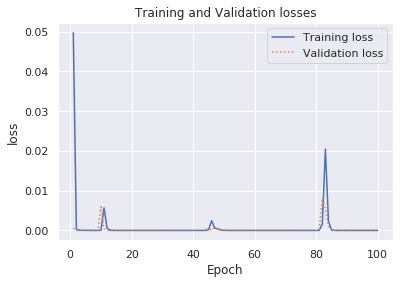

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, '-', label='Training loss')
plt.plot(epochs, val_loss, ':', label='Validation loss')
plt.title('Training and Validation losses')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.plot()

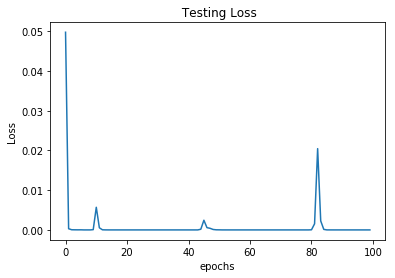

In [7]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title(' Testing Loss')
plt.ylabel('Loss')
plt.xlabel('epochs')
#plt.legend(['Train', 'Test'], loc='upper left')
plt.show()